In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import sys

sys.path.append("../linearclass")

import numpy as np
import util
from logreg import LogisticRegression

<IPython.core.display.Javascript object>

In [3]:
train_path = "train.csv"
valid_path = "valid.csv"
test_path = "test.csv"
save_path = "posonly_X_pred.txt"

<IPython.core.display.Javascript object>

In [4]:
WILDCARD = "X"

output_path_true = save_path.replace(WILDCARD, "true")
output_path_naive = save_path.replace(WILDCARD, "naive")
output_path_adjusted = save_path.replace(WILDCARD, "adjusted")

<IPython.core.display.Javascript object>

LogReg acc: 0.9682539682539683


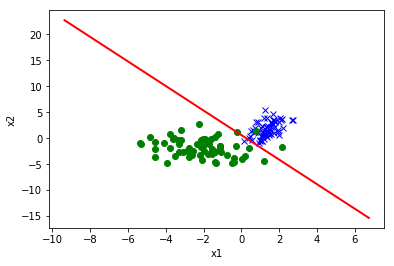

<IPython.core.display.Javascript object>

In [5]:
# Part (a): Train and test on true labels
# Make sure to save predicted probabilities to output_path_true using np.savetxt()

x_train, y_train = util.load_dataset(train_path, label_col="t", add_intercept=True)

model = LogisticRegression(1.0, max_iter=5000, verbose=False)
model.fit(x_train, y_train)

x_test, y_test = util.load_dataset(test_path, label_col="t", add_intercept=True)
util.plot(
    x_test, y_test, model.theta, save_path=output_path_true.replace(".txt", ".jpg")
)

np.savetxt(output_path_true, model.predict(x_test))

print(f"LogReg acc: {util.compute_accuracy(y_test, model.predict(x_test))}")

Loss at step 0: 0.693147
Loss at step 1000: 0.405493
Loss at step 2000: 0.318347
Loss at step 3000: 0.287513
Loss at step 4000: 0.276188
Loss at step 5000: 0.272297
LogReg acc: 0.5


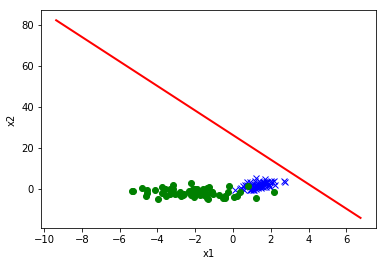

<IPython.core.display.Javascript object>

In [6]:
# Part (b): Train on y-labels and test on true labels
# Make sure to save predicted probabilities to output_path_naive using np.savetxt()

x_train, y_train = util.load_dataset(train_path, label_col="y", add_intercept=True)

model = LogisticRegression(1.0, max_iter=5000)
model.fit(x_train, y_train)

x_test, y_test = util.load_dataset(test_path, label_col="t", add_intercept=True)

util.plot(
    x_test, y_test, model.theta, save_path=output_path_naive.replace(".txt", ".jpg")
)

np.savetxt(output_path_naive, model.predict(x_test))

print(f"LogReg acc: {util.compute_accuracy(y_test, model.predict(x_test))}")

LogReg acc: 0.9603174603174603


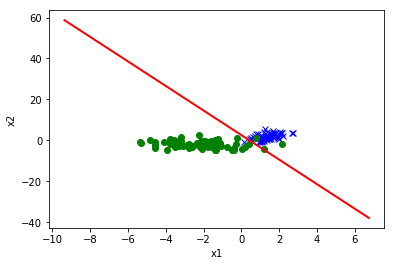

<IPython.core.display.Javascript object>

In [7]:
# Part (f): Apply correction factor using validation set and test on true labels
# Plot and use np.savetxt to save outputs to output_path_adjusted

x_val, y_val = util.load_dataset(valid_path, label_col="y", add_intercept=True)
alpha = model.predict(x_val[y_val == 1]).mean()

x_test, y_test = util.load_dataset(test_path, label_col="t", add_intercept=True)

util.plot(
    x_test,
    y_test,
    model.theta,
    save_path=output_path_naive.replace(".txt", ".jpg"),
    correction=alpha,
)

yhat = model.predict(x_test) / alpha
np.savetxt(output_path_naive, yhat)

print(f"LogReg acc: {util.compute_accuracy(y_test, yhat)}")